<a href="https://colab.research.google.com/github/Djayana/Djayana/blob/main/Projeto_Programacao_para_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDADE FEDERAL DE PERNAMBUCO**<br>
**CENTRO DE INFORMÁTICA**<br>
<br>
**CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS**<br>
**DISCIPLINA: PROGRAMAÇÃO PARA APRENDIZAGEM DE MÁQUINA**<br>
**PROFESSOR: CLEBER ZANCHETTIN**<br>
<br>
**ALUNOS: KRSNA MURARI DE ALBUQUERQUE RODRIGUES e DJAYANA KARLA CAVALCANTI DE FIGUEREDO**<br>
<br>

##Projeto da disciplina:
**Competição do Kaggle: Leaf Classification**<br><bk>

Estima-se que existam cerca de meio milhão de espécies de plantas no mundo. A classificação de espécies tem sido historicamente problemática e muitas vezes resulta em identificações duplicadas.<br><br>
O objetivo desta competição de playground é usar imagens binárias de folhas e recursos extraídos, incluindo forma, margem e textura, para identificar com precisão 99 espécies de plantas. As folhas, pelo seu volume, prevalência e características únicas, são um meio eficaz de diferenciação das espécies vegetais. Eles também fornecem uma introdução divertida à aplicação de técnicas que envolvem recursos baseados em imagem.<br><br>
Como primeiro passo, tente construir um classificador que use os recursos pré-extraídos fornecidos. Em seguida, tente criar um conjunto de seus próprios recursos. Por fim, examine os erros que está cometendo e veja o que pode fazer para melhorar.<br>
<br>


**Descrição do dataset**<br><br>

O conjunto de dados consiste em aproximadamente 1.584 imagens de espécimes de folhas (16 amostras cada de 99 espécies) que foram convertidas em folhas pretas binárias contra fundos brancos. Três conjuntos de recursos também são fornecidos por imagem: um descritor de forma contígua, um histograma de textura interior e um histograma de margem em escala fina. Para cada recurso, um vetor de 64 atributos é fornecido por amostra de folha.<br><br>

Observe que das 100 espécies originais, eliminamos uma por causa de dados associados incompletos no conjunto de dados original.<br><br>

**Descrição dos arquivos**<br><br>

**train.csv** - o conjunto de treinamento;<br>

**test.csv** - o conjunto de teste (validação);<br>

**sample_submission.csv** - um arquivo de envio de amostra no formato correto
images - os arquivos de imagem (cada imagem é nomeada com seu id correspondente).<br><br>

**Campos de dados**<br><br>

**id** - um id anônimo exclusivo para cada uma das imagens;<br>

**margin_1, margin_2, margin_3, ..., margin_64** - cada um dos 64 vetores de atributos referentes às margens das imagens;<br>

**shape_1, shape_2, shape_3, ..., shape_64** - cada um dos 64 vetores de atributo referentes às formas das imagens;<br>

**texture_1, texture_2, texture_3, ..., texture_64** - cada um dos 64 vetores de atributo referentes às texturas das imagens.<br><br>

**Considerações sobre os arquivos** <br><br>

O arquivo **test.csv** não contém a coluna identificadora da espécie a qual cada folha pertence, sem a qual não é possível executar a validação dos modelos a partir deste dataset;<br>

Não foi possível identificar a espécie a qual cada folha pertence a partir do dataset **sample_submission.csv**;<br>

Em virtude da não identificação da característica alvo/target, o tipo de folha, nos arquivos supracitados referentes à amostra de teste/validação dos modelos, tratamos o arquivo **train.csv** como sendo o dataset total para o projeto, de onde foram obtidas as amostras para treinamento e teste.<br>




# 1. Carregamento dos dados

**1.1 Montagem do drive (diretório de trabalho)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.2 Armazenando o caminhos do arquivo de dados**

In [ ]:

train_dataset_file_path ='/content/drive/MyDrive/Leaf Classification - Datasets/train.csv'

**1.3 Lendo e armazenando o arquivo de dados em um dataframe**

In [ ]:
import pandas as pd

In [ ]:
train_dataframe = pd.read_csv(train_dataset_file_path)

# 2. Visualização e limpeza dos dados

**2.1 Descritores dos dados**

In [ ]:
train_dataframe.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


**2.2 Visão geral dos dados**

In [ ]:
train_dataframe

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


**2.3 Verificando se há valores ausentes nos dados**

In [ ]:
train_dataframe.isnull()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
987,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
988,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

valores_faltantes = []
for j in range(0, 194):
  for i in range(0, 900):
    if train_dataframe.isnull().iloc[i, j] == 'True':
      valores_faltantes.append(train_dataframe.isnull().iloc[i, j])



In [ ]:
valores_faltantes

[]

**Conclusão da análise e limpeza dos dados:** não há valores ausentes no dataset, entretanto há um problema com a coluna alvo (target) do dataset, train_dataframe['species'], pois seu tipo de dados é OBJECT, e precisamos de dados tipo NUMERICAL para testar os modelos de Apredizagem de Máquina.

# 3. Representando a coluna 'species'(object) como dados numéricos

In [ ]:
train_dataframe.species.unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [ ]:
train_dataframe.species.describe()

count             990
unique             99
top       Acer_Opalus
freq               10
Name: species, dtype: object

**3.1 Criando um diconário com valores numéricos para os valores únicos da coluna 'species'**

In [ ]:
# Covertendo o vetor coluna 'species.unique()' para numérico
train_species_obj = train_dataframe.species.unique()
train_species_dic = {}
for key, value in enumerate(train_species_obj):
  train_species_dic[value] = key  


In [ ]:
# Dicionário criado
train_species_dic

{'Acer_Opalus': 0,
 'Pterocarya_Stenoptera': 1,
 'Quercus_Hartwissiana': 2,
 'Tilia_Tomentosa': 3,
 'Quercus_Variabilis': 4,
 'Magnolia_Salicifolia': 5,
 'Quercus_Canariensis': 6,
 'Quercus_Rubra': 7,
 'Quercus_Brantii': 8,
 'Salix_Fragilis': 9,
 'Zelkova_Serrata': 10,
 'Betula_Austrosinensis': 11,
 'Quercus_Pontica': 12,
 'Quercus_Afares': 13,
 'Quercus_Coccifera': 14,
 'Fagus_Sylvatica': 15,
 'Phildelphus': 16,
 'Acer_Palmatum': 17,
 'Quercus_Pubescens': 18,
 'Populus_Adenopoda': 19,
 'Quercus_Trojana': 20,
 'Alnus_Sieboldiana': 21,
 'Quercus_Ilex': 22,
 'Arundinaria_Simonii': 23,
 'Acer_Platanoids': 24,
 'Quercus_Phillyraeoides': 25,
 'Cornus_Chinensis': 26,
 'Liriodendron_Tulipifera': 27,
 'Cytisus_Battandieri': 28,
 'Rhododendron_x_Russellianum': 29,
 'Alnus_Rubra': 30,
 'Eucalyptus_Glaucescens': 31,
 'Cercis_Siliquastrum': 32,
 'Cotinus_Coggygria': 33,
 'Celtis_Koraiensis': 34,
 'Quercus_Crassifolia': 35,
 'Quercus_Kewensis': 36,
 'Cornus_Controversa': 37,
 'Quercus_Pyrenaica': 3

**3.2 Criando uma coluna numérica equivalente a 'train_dataframe.species' com a codificação 'species_dic'**

In [ ]:
train_species_column = train_dataframe.species
train_species_num = []
for key, value in enumerate(train_species_column):
  train_species_num.append(train_species_dic[value])

In [ ]:
# Coluna numérica representativa da coluna de objetos 'train_dataframe.species' de acordo com o dicionário 'species_dic'
train_species_num

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 4,
 21,
 22,
 23,
 24,
 25,
 26,
 25,
 15,
 27,
 28,
 3,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 4,
 2,
 36,
 14,
 37,
 38,
 39,
 40,
 6,
 41,
 42,
 43,
 44,
 45,
 20,
 27,
 14,
 32,
 45,
 34,
 46,
 29,
 47,
 48,
 49,
 50,
 34,
 51,
 17,
 4,
 27,
 52,
 53,
 35,
 54,
 53,
 40,
 13,
 6,
 55,
 56,
 39,
 43,
 57,
 58,
 59,
 60,
 34,
 61,
 62,
 63,
 62,
 64,
 62,
 41,
 65,
 34,
 49,
 66,
 11,
 51,
 6,
 67,
 68,
 69,
 63,
 4,
 38,
 23,
 68,
 23,
 70,
 36,
 17,
 56,
 56,
 3,
 27,
 71,
 46,
 72,
 73,
 74,
 52,
 33,
 75,
 70,
 76,
 47,
 77,
 62,
 78,
 79,
 67,
 64,
 77,
 32,
 56,
 18,
 45,
 12,
 61,
 34,
 59,
 41,
 5,
 35,
 15,
 20,
 13,
 54,
 80,
 81,
 22,
 62,
 16,
 82,
 37,
 2,
 4,
 75,
 69,
 65,
 11,
 72,
 31,
 30,
 83,
 19,
 38,
 66,
 18,
 84,
 75,
 80,
 82,
 81,
 57,
 30,
 46,
 0,
 20,
 45,
 24,
 85,
 17,
 59,
 65,
 4,
 71,
 54,
 82,
 24,
 38,
 86,
 15,
 10,
 5,
 87,
 56,
 11,
 88,
 89,
 90,
 59,
 

In [ ]:
print(len(train_species_num))

990


**3.2.1 Convertendo o array 'species_num' para o formato DataFrame do pandas**

In [ ]:
train_species_num_df = pd.DataFrame(train_species_num, columns=['species(numerical)'])
train_species_num_df.head

<bound method NDFrame.head of      species(numerical)
0                     0
1                     1
2                     2
3                     3
4                     4
..                  ...
985                   5
986                  57
987                  55
988                   7
989                  13

[990 rows x 1 columns]>

**3.2.2 Concatenando os DataFrames 'train_species_num_df' e 'train_dataframe'**

In [ ]:
train_dataframe_numerico = pd.concat([train_species_num_df, train_dataframe], axis = 1)

In [ ]:
train_dataframe_numerico

,species(numerical),id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,5,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,57,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,55,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,7,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


# 4. Dividindo o dataset para treino e teste

In [ ]:
# Dataset de preditores
X = train_dataframe_numerico.iloc[:, 3:]
# Dataset de alvos de predição (target)
y = train_dataframe_numerico['species(numerical)']

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)


# **APÊNDICE DESLOCADO**: Aplicando PCA ao conjunto de preditores

**Neste tópico**, buscamos reduzir a dimensionalidade do cojunto de preditores (192 componentes/colunas) com a pretenção de que as componentes principais "selecionassem" os componentes com maior correlação com a componente alvo/target. Todavia, ocorreu o inverso, pois a acurácia do modelo testado, o "Decision Tree Regressor", diminuiu significativamente em relação ao testado com o cojunto de preditores não tratado com PCA.<br><br>

O conhecimento relevante obtido a partir deste tópico foi o gerado pelo gráfico **variância acumulada Vs. número de componentes**, de onde é possível inferir que a partir de um mínimo de 50 componentes já é possível obter a totalidade da variância acumulada.<br><br>

Finalizando a análise do uso da PCA, entendemos que deve ser utilizada na etapa de **Análise Exploratória dos Dados** para obter uma referência em relação à quantidade mínima de componentes/colunas que podem ser selecionadas do total de colunas para reduzir a dimensionalidade do cojunto de dados sem perda significativa do poder de aprendizado dos modelos de Machine Learning.<br><br>


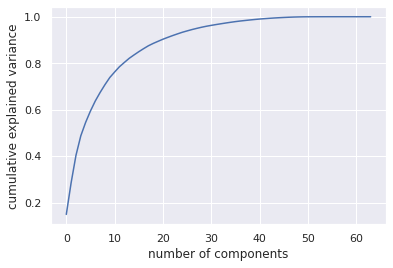

In [ ]:
# Escolhendo a quantidade de componentes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

train_dataframe_numerico_PCA = PCA().fit(digits.data)
plt.plot(np.cumsum(train_dataframe_numerico_PCA.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# PCA Obs. inicialmente usei n_components=3 e baixou muito a acurácia (0.25)
# Após fazer a análise acima, coloquei n_components=70, mas a acurácia continuou baixa (0.27)
from sklearn.decomposition import PCA
train_dataframe_numerico_PCA = PCA(n_components=50)
train_dataframe_numerico_PCA.fit(X)
train_df_num_PCA = train_dataframe_numerico_PCA.transform(X)
print(X.shape)
print(train_df_num_PCA.shape)


(990, 192)
(990, 50)


In [ ]:
train_PCA = pd.DataFrame(train_df_num_PCA)
train_PCA.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.034391,-0.044043,-0.078234,0.015091,0.014542,0.026259,0.012217,0.043066,0.026620,-0.024099,...,0.008785,-0.000773,-0.002283,0.006115,0.007842,-0.011585,-0.008903,-0.004373,-0.005027,0.008506
1,-0.098290,-0.076697,-0.016510,-0.018842,-0.009512,0.006152,0.028564,0.048211,-0.062750,0.012860,...,0.004827,0.011693,-0.011203,-0.006798,-0.005107,0.008312,-0.008844,0.008481,0.017878,0.012926
2,0.087150,-0.084009,0.072021,-0.018492,0.038819,0.024141,-0.074831,0.049646,-0.048841,-0.030141,...,0.000894,0.036435,-0.028209,0.004499,-0.002580,0.014299,-0.008596,-0.008185,0.008107,-0.009872
3,-0.095144,-0.087834,-0.069639,-0.005416,0.067378,0.055953,0.079994,0.033601,-0.060079,0.005913,...,0.021139,-0.009285,0.007248,0.007666,-0.000327,0.003589,-0.013430,0.018970,-0.021215,-0.003330
4,0.087992,-0.079204,0.014859,0.016285,0.086109,-0.009683,-0.083320,-0.013338,0.014871,0.040679,...,0.036400,0.012421,0.025287,-0.011359,0.022224,-0.011198,0.003468,-0.003197,-0.004485,-0.014454


In [ ]:
# Obtendo os conjuntos para TREINO e TESTE
from sklearn.model_selection import train_test_split
train_X_PCA, test_X_PCA, train_y_PCA, test_y_PCA = train_test_split(train_PCA, y, random_state=0)

In [ ]:
# Trainando o Modelo
from sklearn.tree import DecisionTreeRegressor
leaf_model_PCA = DecisionTreeRegressor()
leaf_model_PCA.fit(train_X_PCA, train_y_PCA)

DecisionTreeRegressor()

In [ ]:
# Avaliando o Modelo
from sklearn.metrics import accuracy_score
accuracy_score(test_y_PCA, leaf_model_PCA.predict(test_X_PCA))

0.2782258064516129

# 5. Especificação e Ajuste de Modelos de Apredizagem de Máquina

**5.1 Especificação e Ajuste do Modelo 1: DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
leaf_model_1 = DecisionTreeRegressor()
leaf_model_1.fit(train_X, train_y)

DecisionTreeRegressor()

**5.2 Especificação e Ajuste do Modelo 2: K NEIGHBORS CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
leaf_model_2 = KNeighborsClassifier()
leaf_model_2.fit(train_X, train_y)

KNeighborsClassifier()

**5.3 Especificação e Ajuste do Modelo 3: GAUSSIAN NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
leaf_model_3 = GaussianNB()
leaf_model_3.fit(train_X,train_y)

GaussianNB()

**5.4 Especificação e Ajuste do Modelo 4: RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
leaf_model_4 = RandomForestClassifier(n_estimators=100, random_state=0)
leaf_model_4.fit(train_X, train_y)

RandomForestClassifier(random_state=0)

# 6. Validação dos Modelos

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Modelo 1
accuracy_score(test_y, leaf_model_1.predict(test_X))

0.41935483870967744

In [ ]:
# Modelo 2
accuracy_score(test_y, leaf_model_2.predict(test_X))

0.8064516129032258

In [ ]:
# Modelo 3
accuracy_score(test_y, leaf_model_3.predict(test_X))

0.45161290322580644

In [ ]:
# Modelo 4
accuracy_score(test_y, leaf_model_4.predict(test_X))

0.9435483870967742

# 7. Matrizes de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

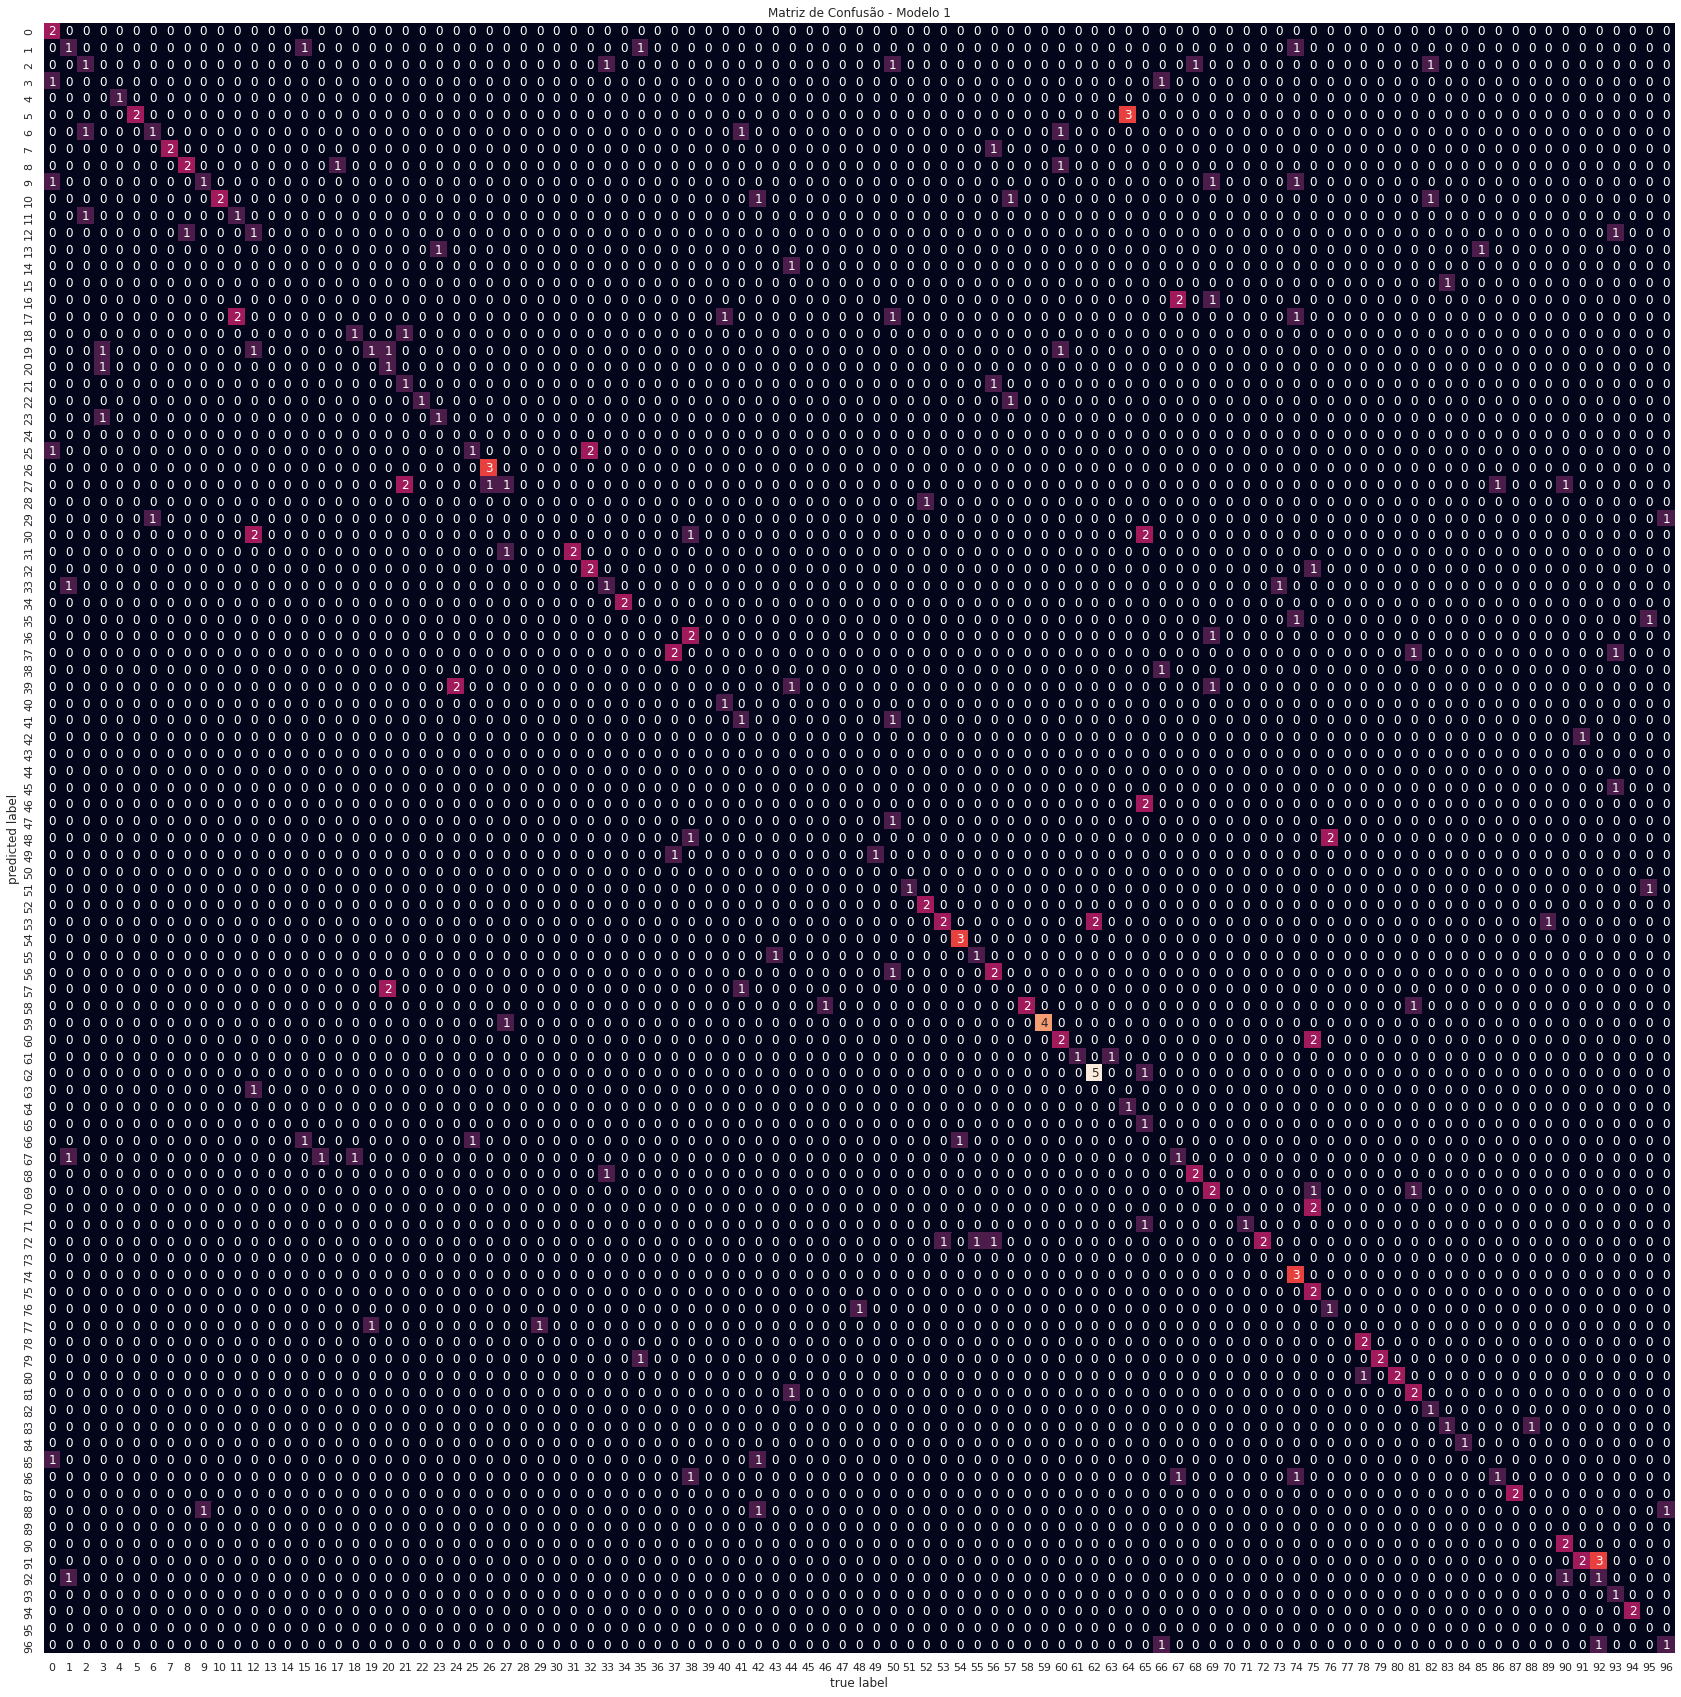

In [ ]:
# Modelo 1
plt.figure(figsize=(30, 30))
mat = confusion_matrix(test_y, leaf_model_1.predict(test_X))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.title('Matriz de Confusão - Modelo 1')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

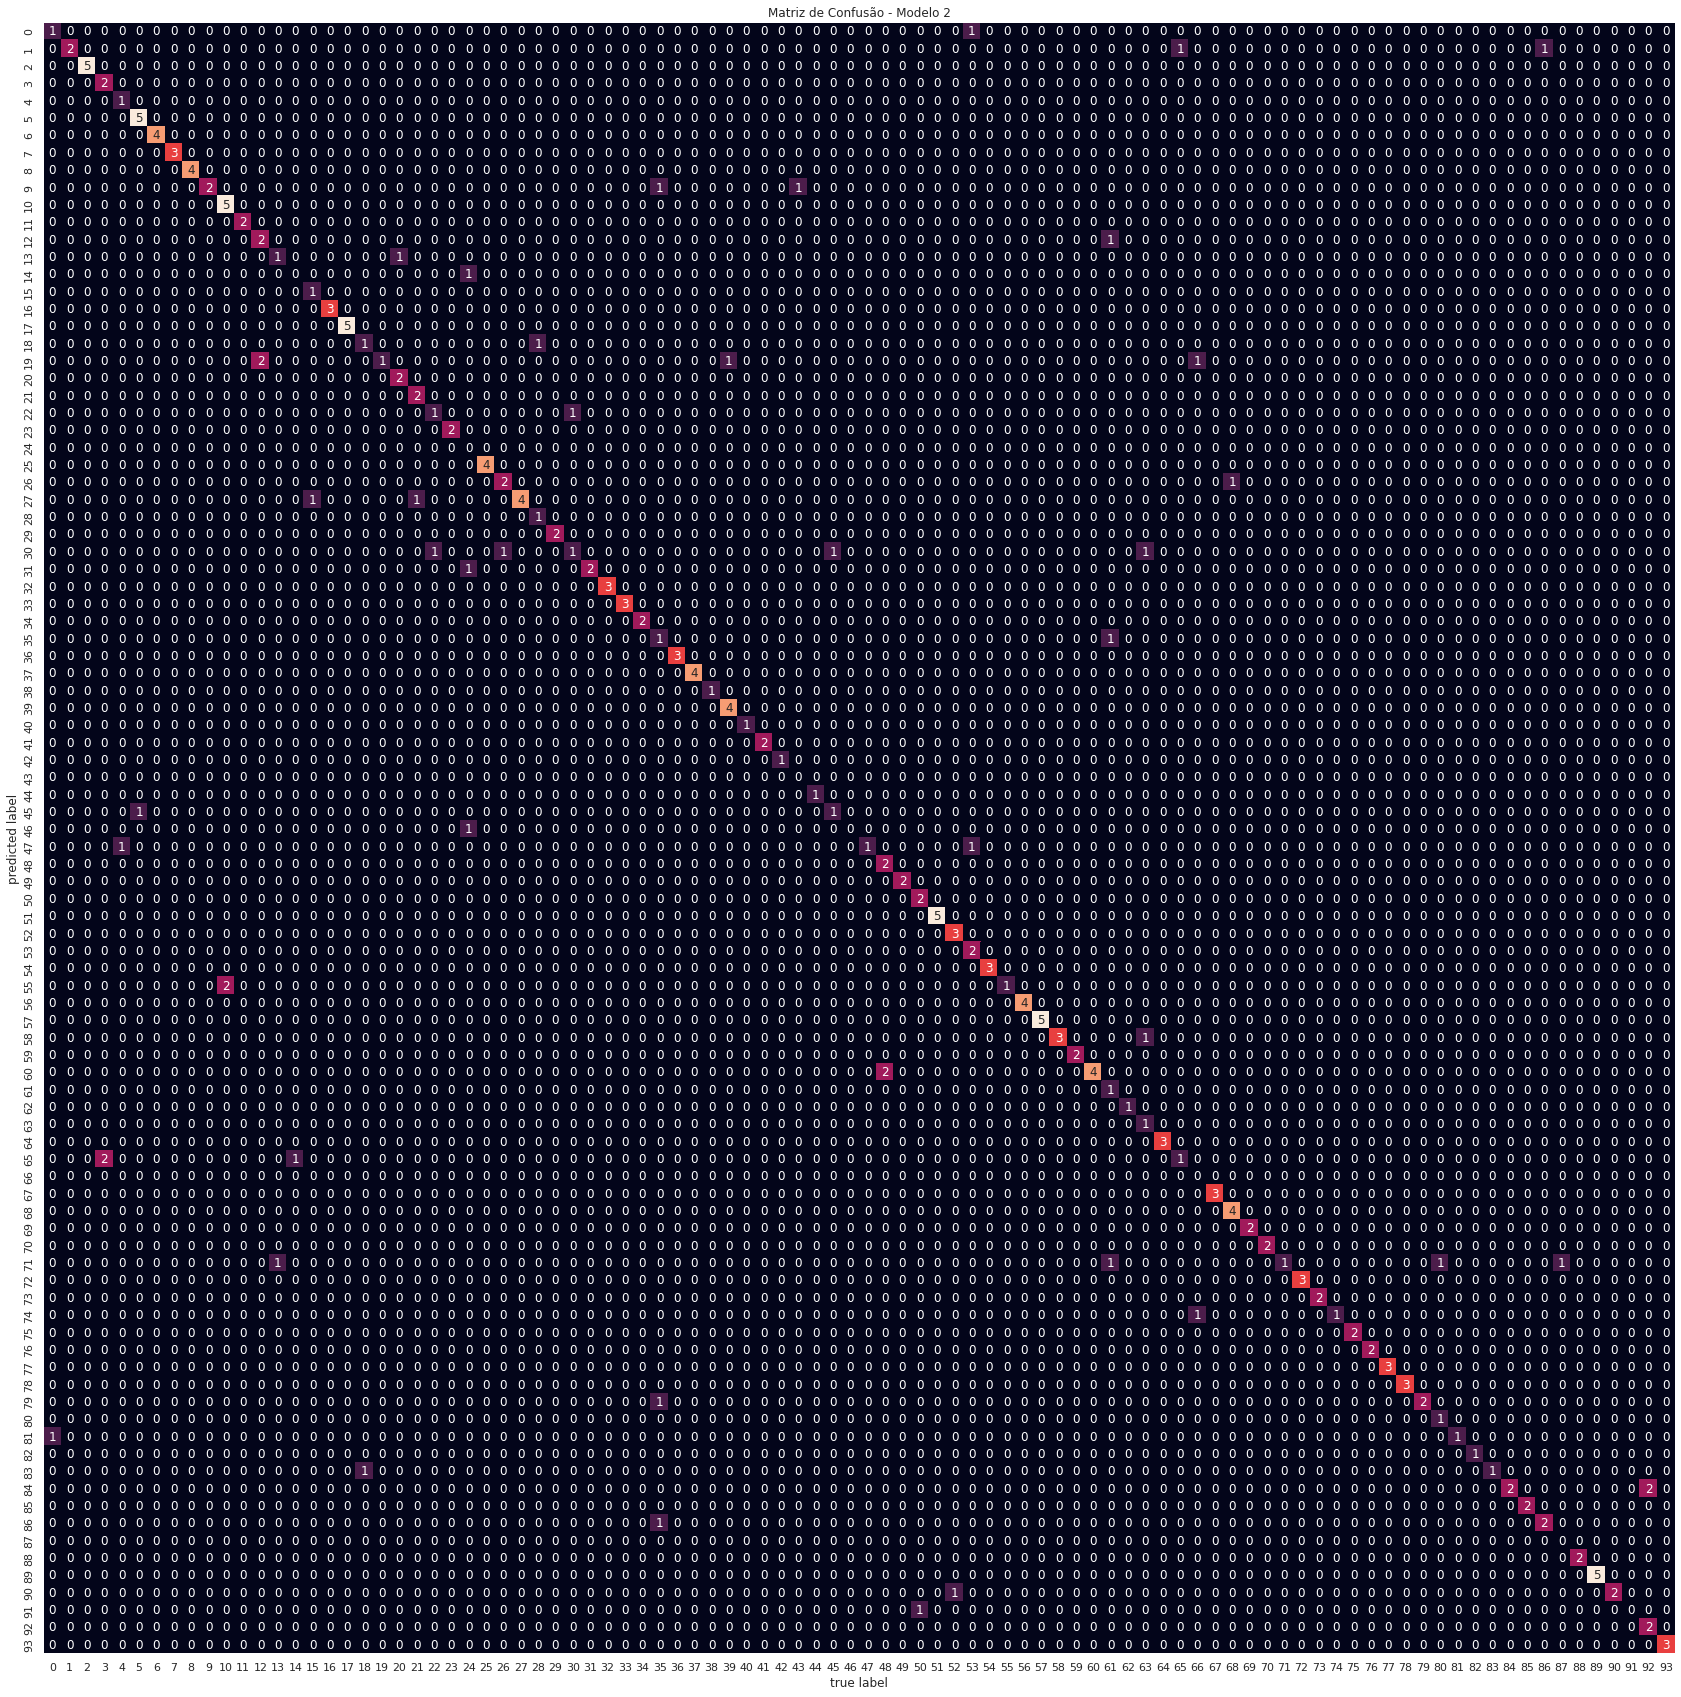

In [ ]:
# Modelo 2
plt.figure(figsize=(30, 30))
mat = confusion_matrix(test_y, leaf_model_2.predict(test_X))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.title('Matriz de Confusão - Modelo 2')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

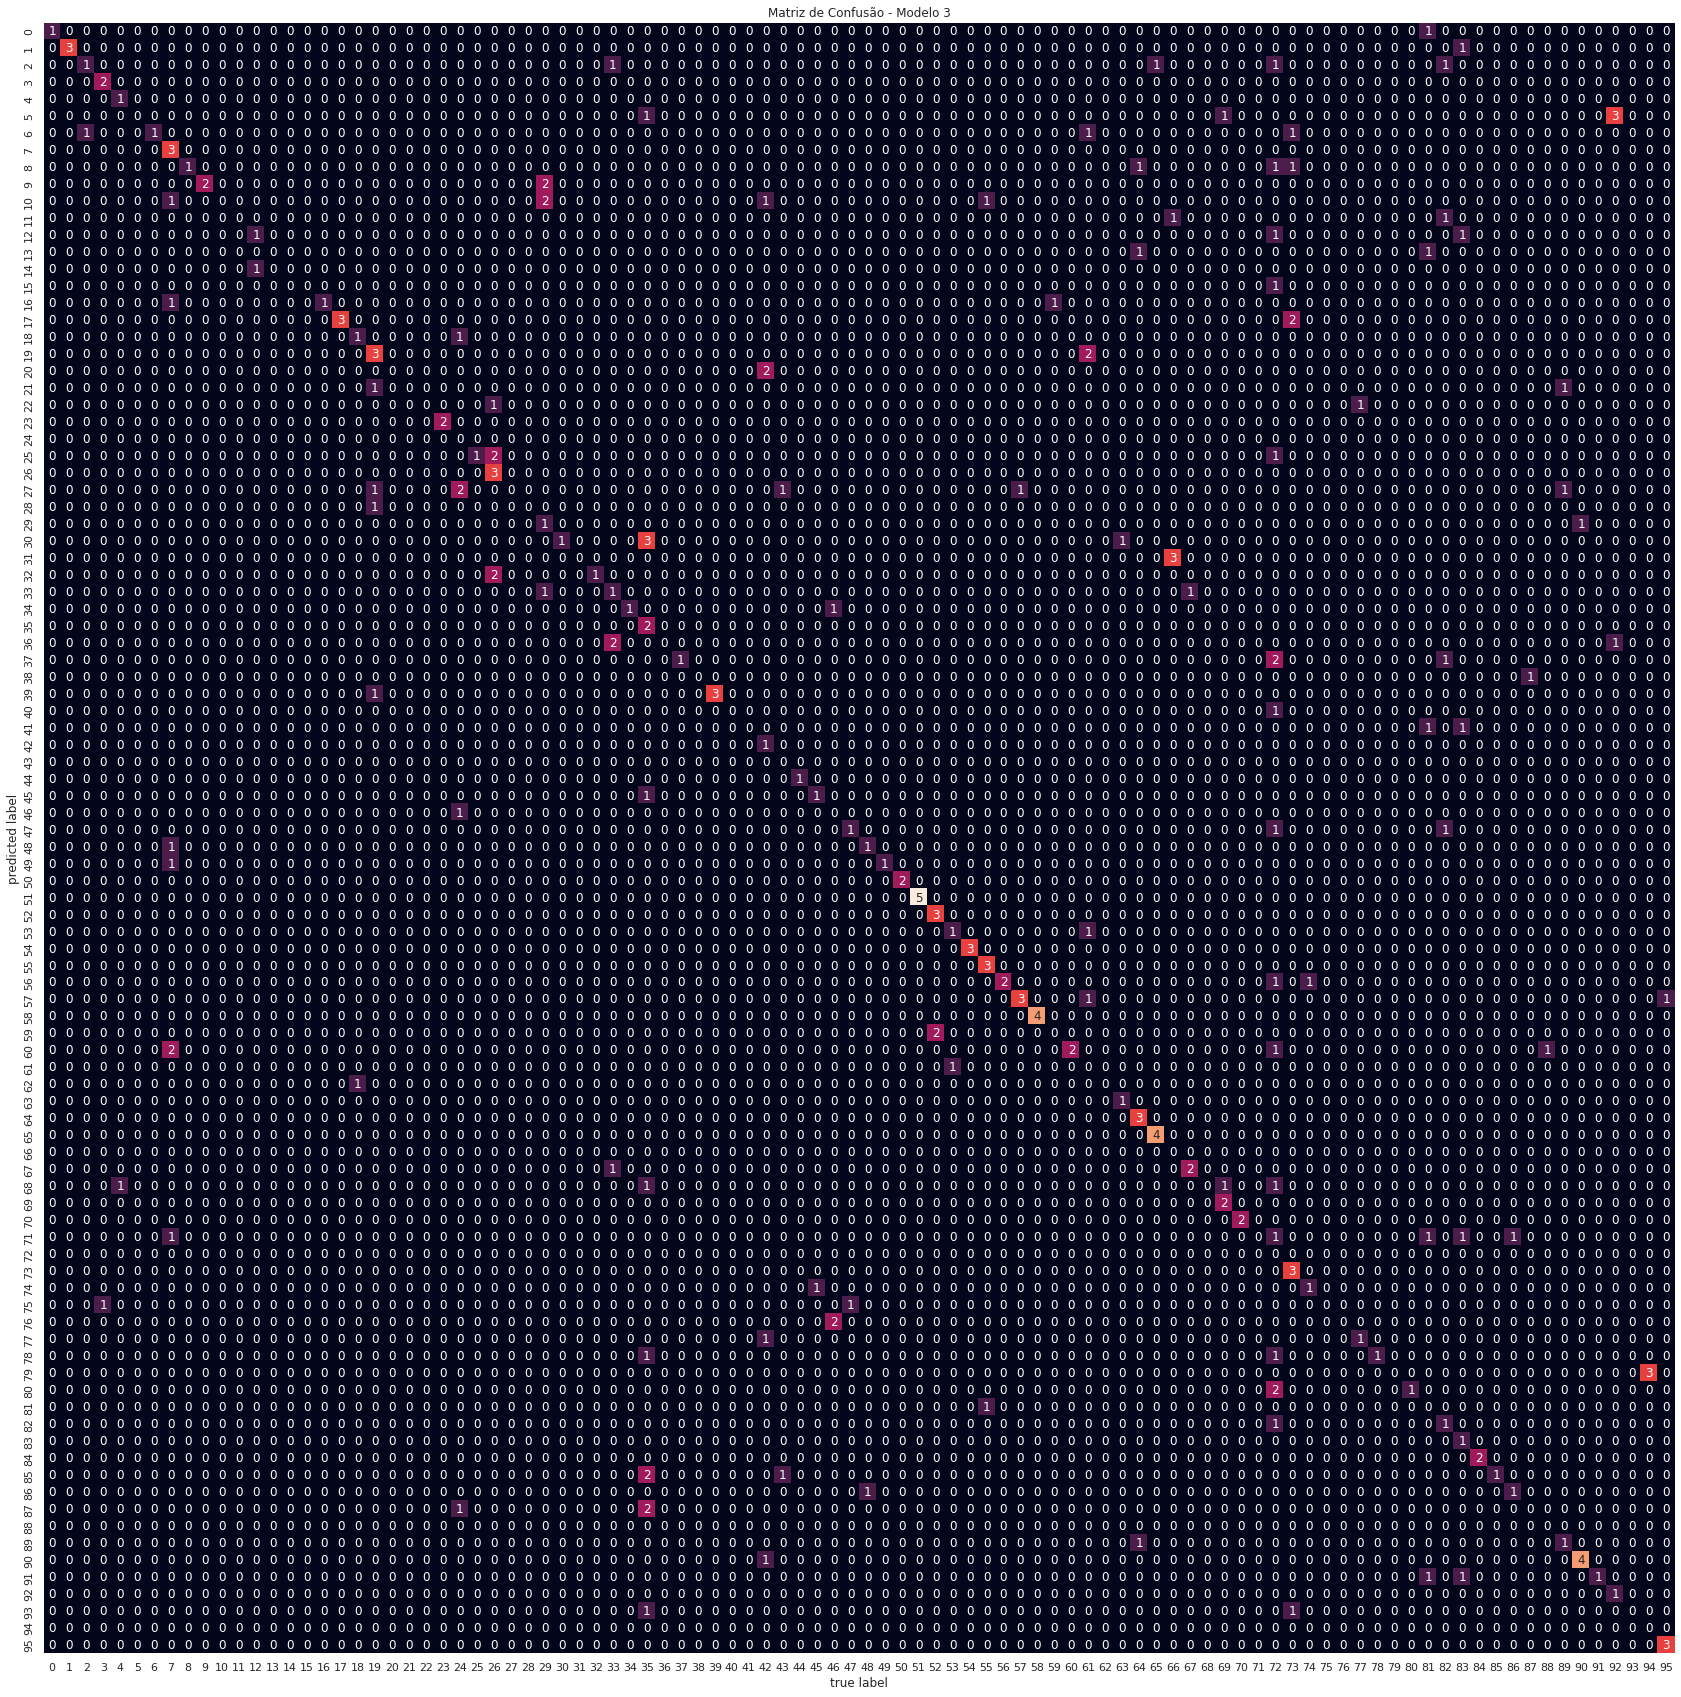

In [ ]:
# Modelo 3
plt.figure(figsize=(30, 30))
mat = confusion_matrix(test_y, leaf_model_3.predict(test_X))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.title('Matriz de Confusão - Modelo 3')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

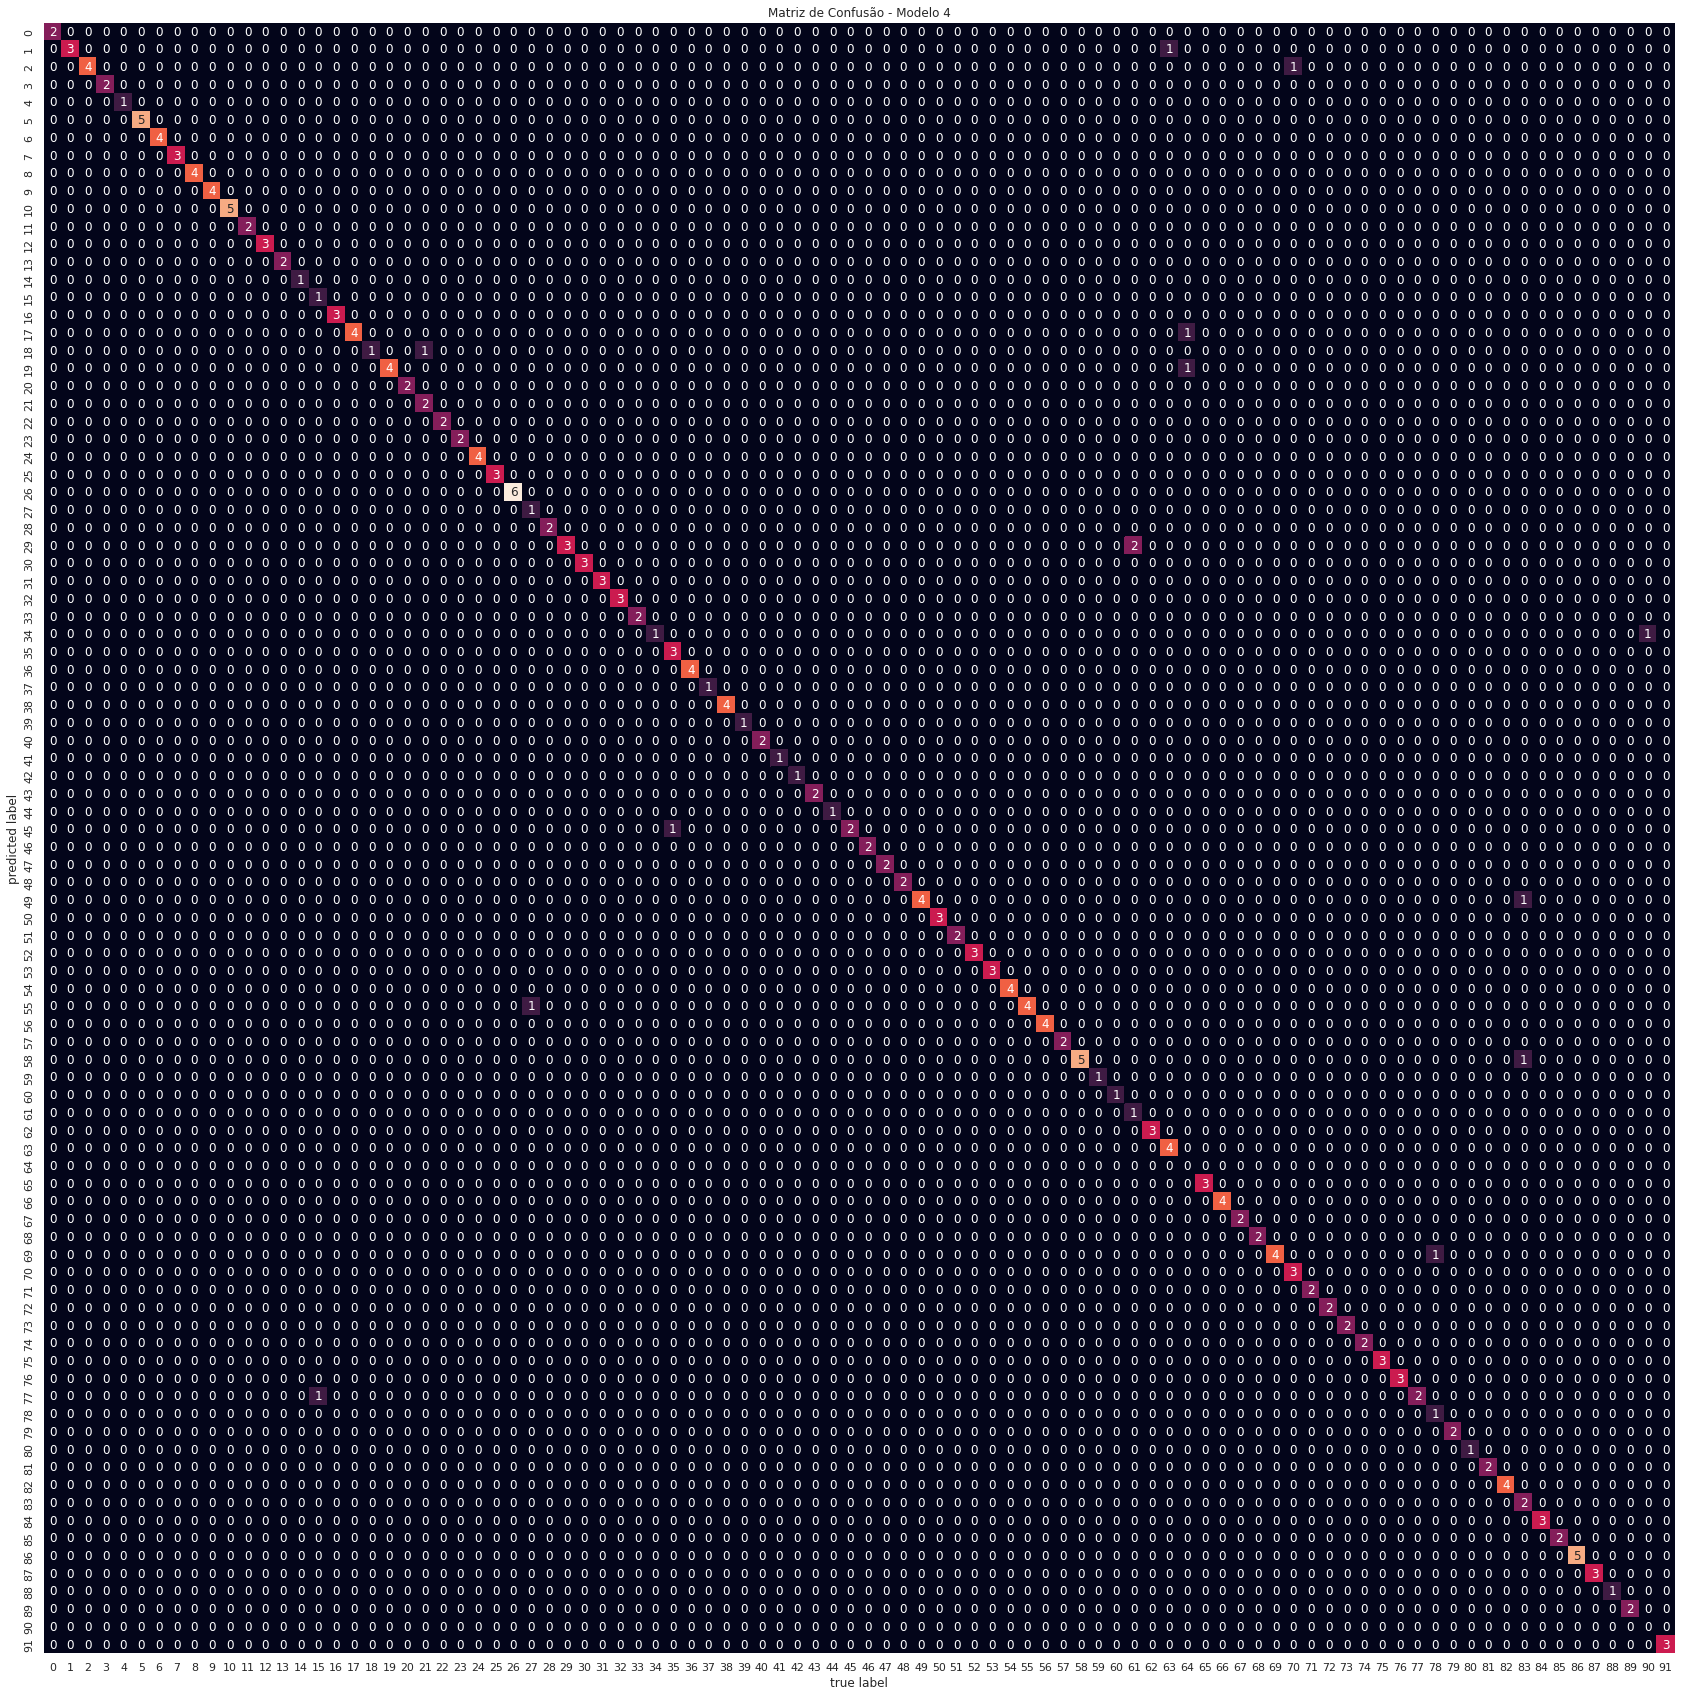

In [ ]:
# Modelo 4
plt.figure(figsize=(30, 30))
mat = confusion_matrix(test_y, leaf_model_4.predict(test_X))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.title('Matriz de Confusão - Modelo 4')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# 8. Relatórios de Classificação

In [ ]:
# Modelo 1
from sklearn.metrics import classification_report
print(classification_report(test_y, leaf_model_1.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         2
         1.0       0.25      0.25      0.25         4
         2.0       0.33      0.20      0.25         5
         3.0       0.00      0.00      0.00         2
         4.0       1.00      1.00      1.00         1
         5.0       1.00      0.40      0.57         5
         6.0       0.50      0.25      0.33         4
         7.0       1.00      0.67      0.80         3
         8.0       0.67      0.50      0.57         4
        10.0       0.50      0.25      0.33         4
        11.0       1.00      0.40      0.57         5
        12.0       0.33      0.50      0.40         2
        13.0       0.20      0.33      0.25         3
        14.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         3
        18.0       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Modelo 2
from sklearn.metrics import classification_report
print(classification_report(test_y, leaf_model_2.predict(test_X)))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      0.50      0.67         4
           2       1.00      1.00      1.00         5
           3       0.50      1.00      0.67         2
           4       0.50      1.00      0.67         1
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         4
          10       1.00      0.50      0.67         4
          11       0.71      1.00      0.83         5
          12       1.00      1.00      1.00         2
          13       0.50      0.67      0.57         3
          14       0.50      0.50      0.50         2
          15       0.00      0.00      0.00         1
          16       0.50      1.00      0.67         1
          17       1.00      1.00      1.00         3
          18       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Modelo 3
from sklearn.metrics import classification_report
print(classification_report(test_y, leaf_model_3.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.75      0.86         4
           2       0.50      0.20      0.29         5
           3       0.67      1.00      0.80         2
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         5
           6       1.00      0.25      0.40         4
           7       0.30      1.00      0.46         3
           8       1.00      0.25      0.40         4
          10       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         2
          13       0.50      0.33      0.40         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       1.00      0.33      0.50         3
          18       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Modelo 4
from sklearn.metrics import classification_report
print(classification_report(test_y, leaf_model_4.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.75      0.86         4
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          16       0.50      1.00      0.67         1
          17       1.00      1.00      1.00         3
          18       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
